# Creating .CSV from original files

In [ ]:
import pandas as pd

file_path = '/content/0702  межвитковые фазы A ток фазы А.txt'

time = []
channel_1 = []

with open(file_path, 'r', encoding='latin') as file:
    lines = file.readlines()

    for line in lines:
        if ";" in line:
            parts = line.strip().split(";")
            time.append(float(parts[0].strip()))
            channel_1.append(float(parts[1].strip()))

data = {'Time (ms)': time, 'Data': channel_1}
df = pd.DataFrame(data)

print(len(df))

df.to_csv('Anomalous.csv', index=False)


50000


#Plotting Files

   transformed_value
0          90.447374
1          56.862973
2          53.507743
3          54.316061
4          52.524171


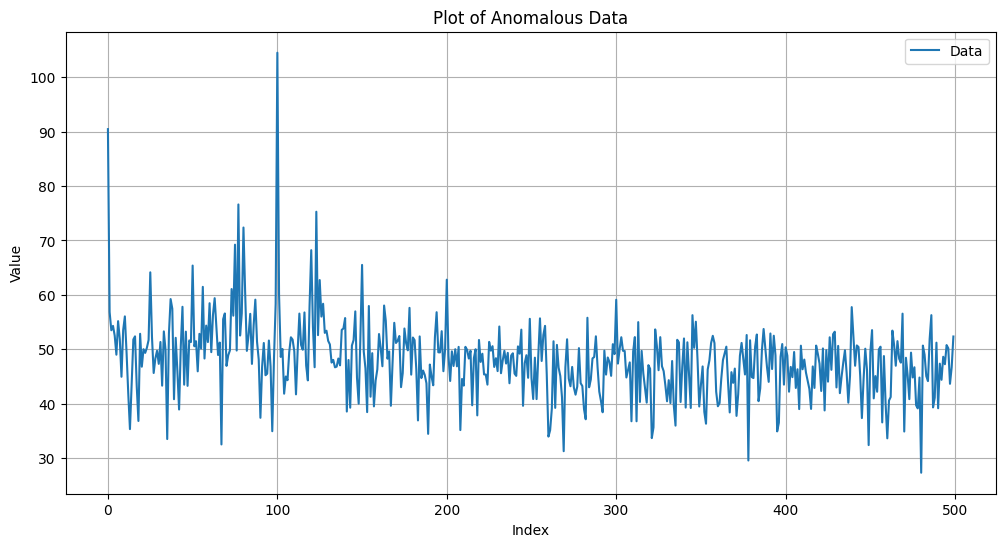

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/transformed_window_10.csv')
print(df.head())

plt.figure(figsize=(12, 6))
plt.plot(df['transformed_value'], label='Data')
plt.title('Plot of Anomalous Data')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()



   frequency  transformed_value
0        0.0          90.474440
1        0.5          58.990106
2        1.0          53.447532
3        1.5          45.455356
4        2.0          58.932493


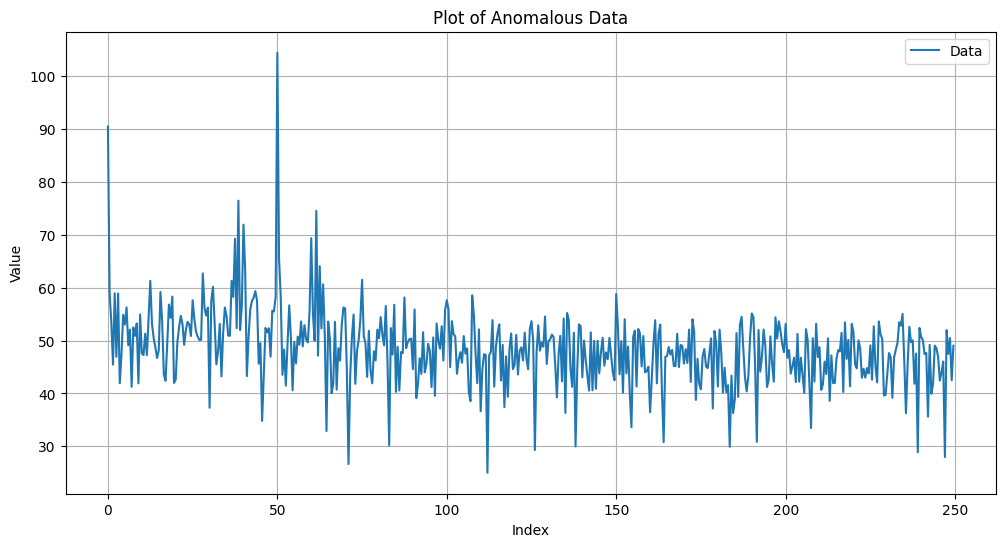

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/transformed_window_17.csv')

print(df.head())

plt.figure(figsize=(12, 6))
plt.plot(df['frequency'], df['transformed_value'], label='Data')  # Adjust column index based on actual data
plt.title('Plot of Anomalous Data')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


<Figure size 1200x600 with 0 Axes>

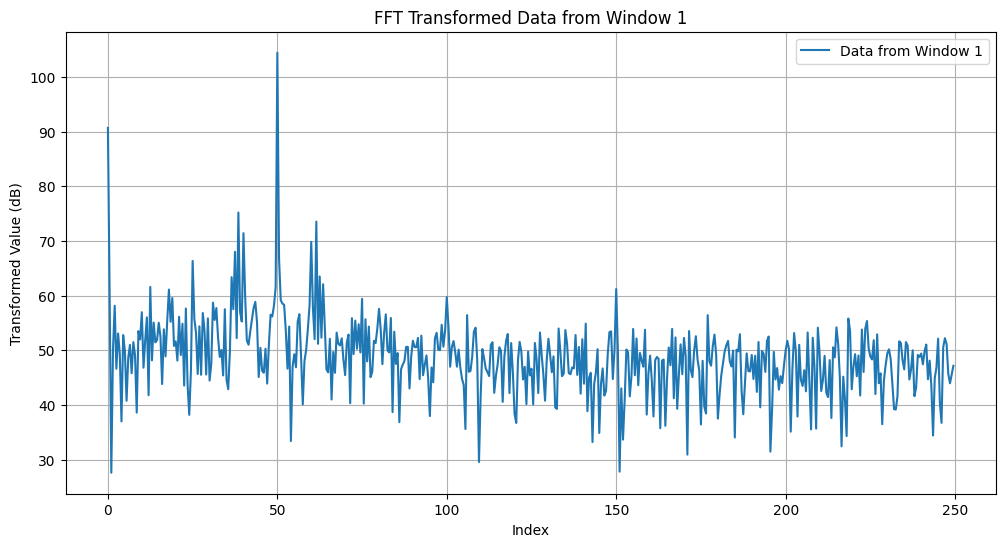

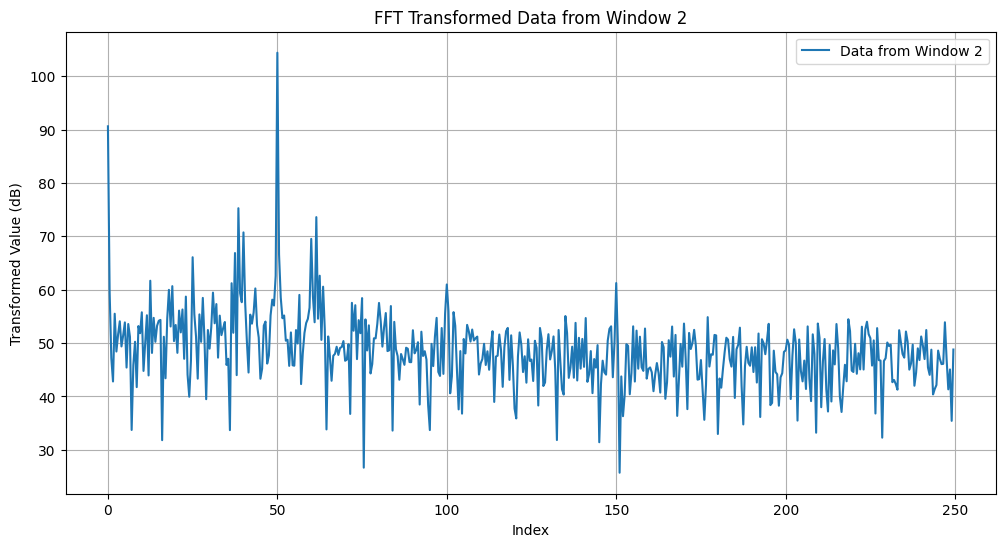

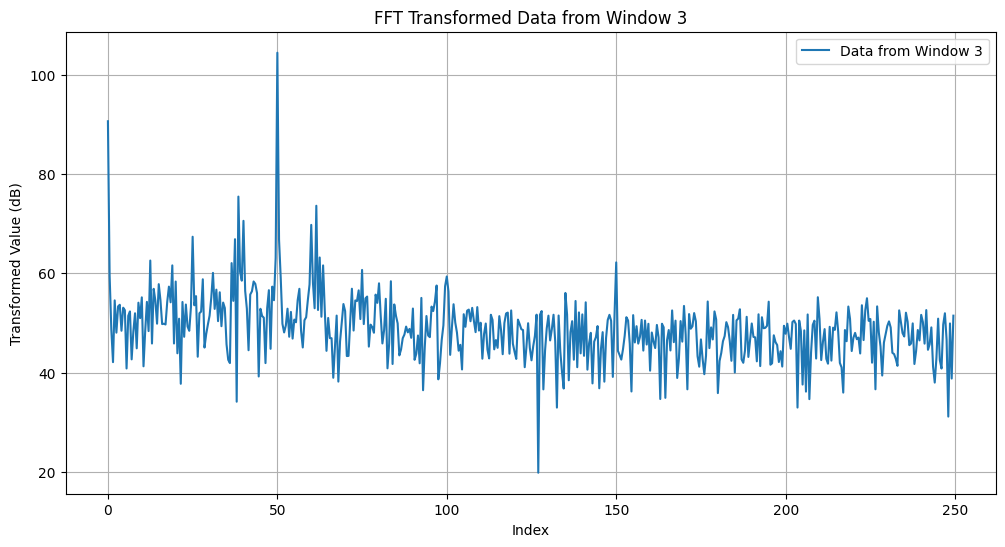

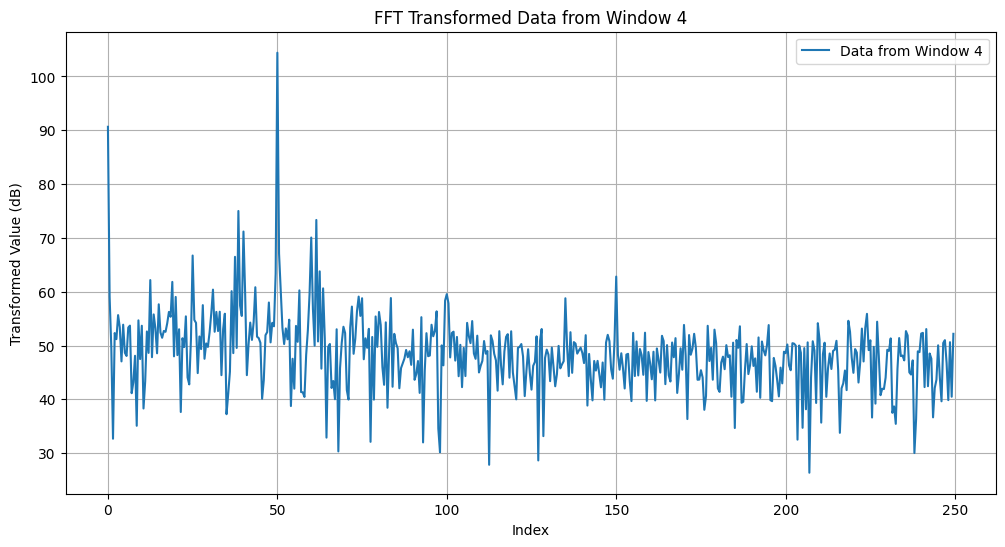

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_paths = [
    '/content/transformed_window_40.csv',
    '/content/transformed_window_41.csv',
    '/content/transformed_window_42.csv',
    '/content/transformed_window_43.csv',
    ]

plt.figure(figsize=(12, 6))

for i, file_path in enumerate(file_paths, start=1):
    df = pd.read_csv(file_path)

    plt.figure(figsize=(12, 6))

    plt.plot(df['frequency'], df['transformed_value'], label=f'Data from Window {i}')

    plt.title(f'FFT Transformed Data from Window {i}')
    plt.xlabel('Index')
    plt.ylabel('Transformed Value (dB)')
    plt.legend()
    plt.grid(True)





<Figure size 1200x600 with 0 Axes>

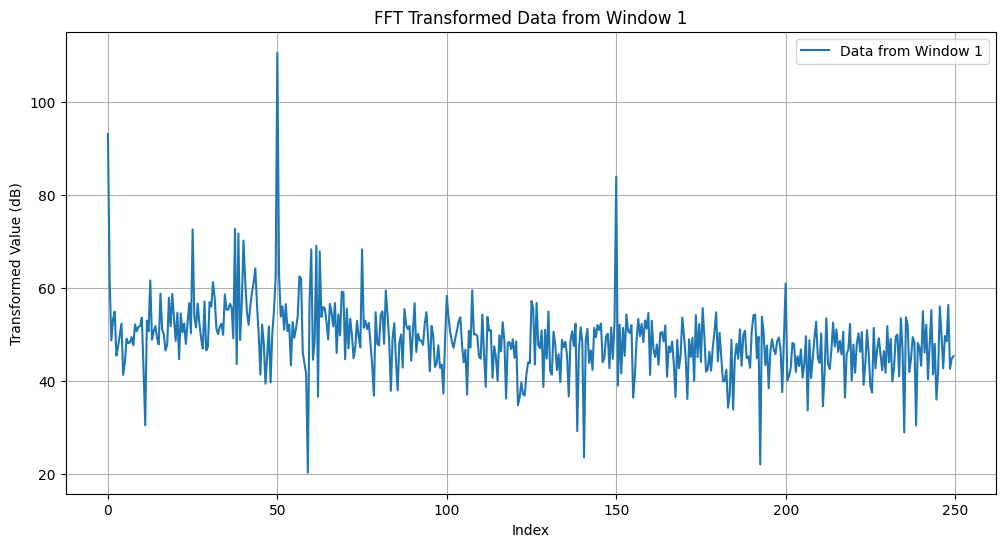

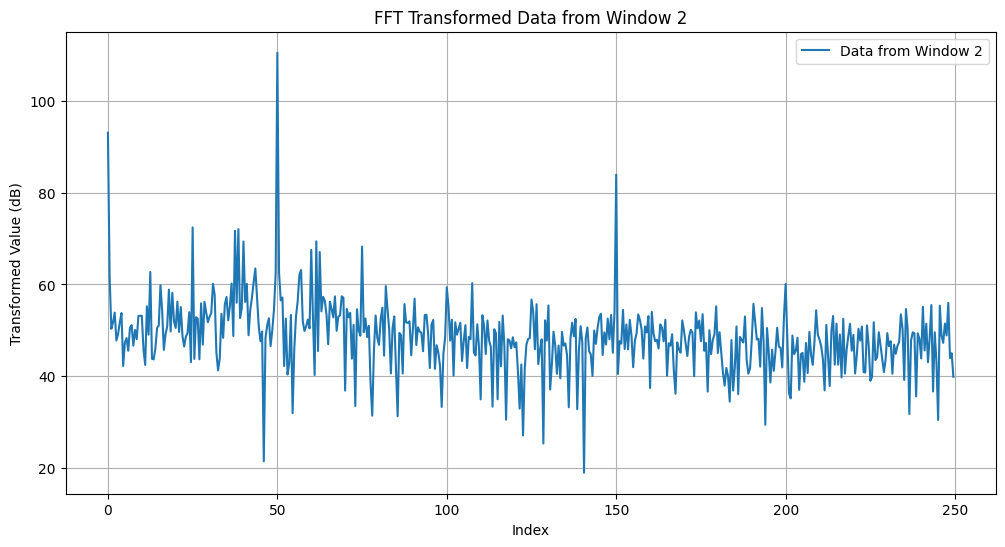

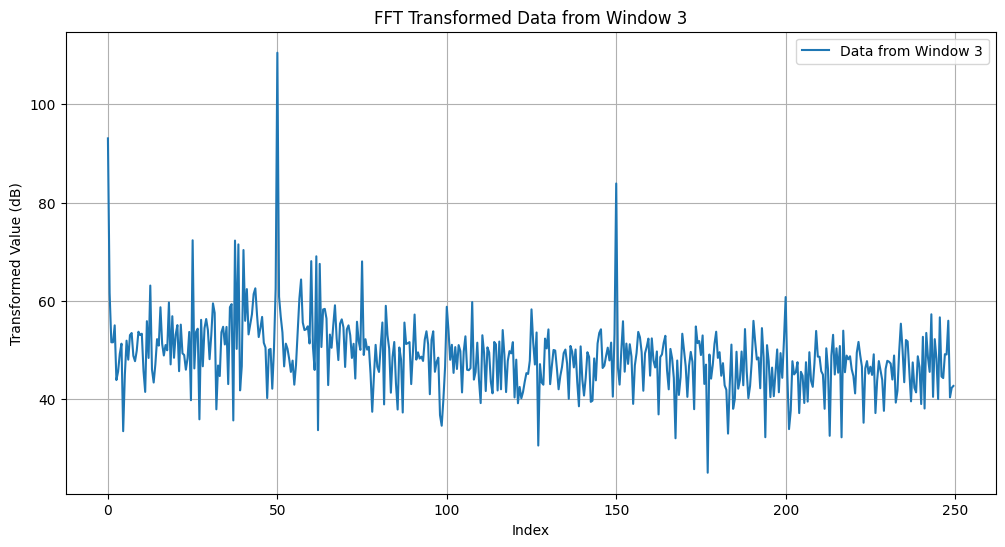

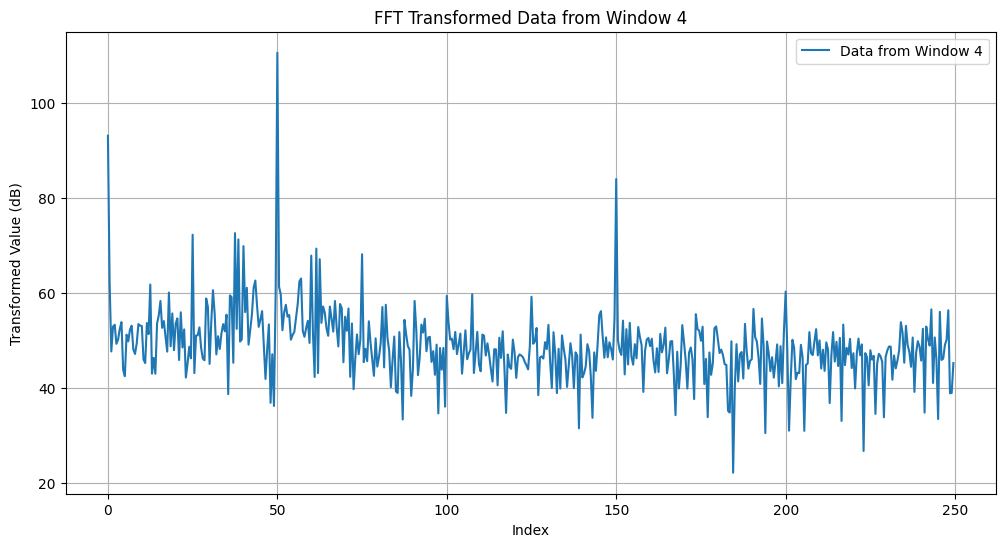

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# List of file paths to be plotted
file_paths = [
    '/content/transformed_window_18.csv',
    '/content/transformed_window_19.csv',
    '/content/transformed_window_20.csv',
    '/content/transformed_window_21.csv',
    ]

plt.figure(figsize=(12, 6))

for i, file_path in enumerate(file_paths, start=1):
    df = pd.read_csv(file_path)

    plt.figure(figsize=(12, 6))

    plt.plot(df['frequency'], df['transformed_value'], label=f'Data from Window {i}')

    plt.title(f'FFT Transformed Data from Window {i}')
    plt.xlabel('Index')
    plt.ylabel('Transformed Value (dB)')
    plt.legend()
    plt.grid(True)





# Extracting Segments

In [ ]:
!unzip /content/NormalForSynt.zip

### Extracting Data From Files

In [9]:
import os
import numpy as np
import pandas as pd

def load_files_from_directory(directory):
    data = []
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            file_path = os.path.join(directory, filename)
            df = pd.read_csv(file_path)
            data.append(df['transformed_value'])
    return np.array(data)

directory = '/content/Final Anomalous'

fft_data = load_files_from_directory(directory)
fft_data.shape

(1501, 500)

### Extracting Peak Segments

In [62]:
def extract_and_normalize_peak_segments(fft_data, segment_length=20, target_frequency=50):
    peak_segments = []
    means = []
    stds = []
    target_frequency = target_frequency*2+2
    for spec in fft_data:
        start = max(0, target_frequency - segment_length // 2 - 1)
        end = min(len(spec), target_frequency + segment_length // 2 - 1)
        segment = spec[start:end]
        if len(segment) < segment_length:
            segment = np.pad(segment, (0, segment_length - len(segment)), 'constant')
        mean = np.mean(segment)
        std = np.std(segment)
        normalized_segment = (segment - mean) / std
        peak_segments.append(normalized_segment)
        means.append(mean)
        stds.append(std)
    return np.array(peak_segments), np.array(means), np.array(stds)

segment_length = 10
target_frequency = 150
normalized_peak_segments, segment_means, segment_stds = extract_and_normalize_peak_segments(fft_data, segment_length, target_frequency)
normalized_peak_segments.shape


(1501, 10)

In [12]:
def extract_and_normalize_peak_segments(fft_data, segment_length=20, target_frequency=50):
    peak_segments = []
    min_vals = []
    max_vals = []
    target_frequency = target_frequency*2+2
    for spec in fft_data:
        start = max(0, target_frequency - segment_length // 2 - 1)
        end = min(len(spec), target_frequency + segment_length // 2 - 1)
        segment = spec[start:end]
        if len(segment) < segment_length:
            segment = np.pad(segment, (0, segment_length - len(segment)), 'constant')
        min_val = np.min(segment)
        max_val = np.max(segment)
        normalized_segment = (segment - min_val) / (max_val - min_val)
        peak_segments.append(normalized_segment)
        min_vals.append(min_val)
        max_vals.append(max_val)
    return np.array(peak_segments), np.array(min_vals), np.array(max_vals)

segment_length = 6
target_frequency = 150
normalized_peak_segments, segment_mins, segment_maxs = extract_and_normalize_peak_segments(fft_data, segment_length, target_frequency)


### Plot Extracted Segemnts

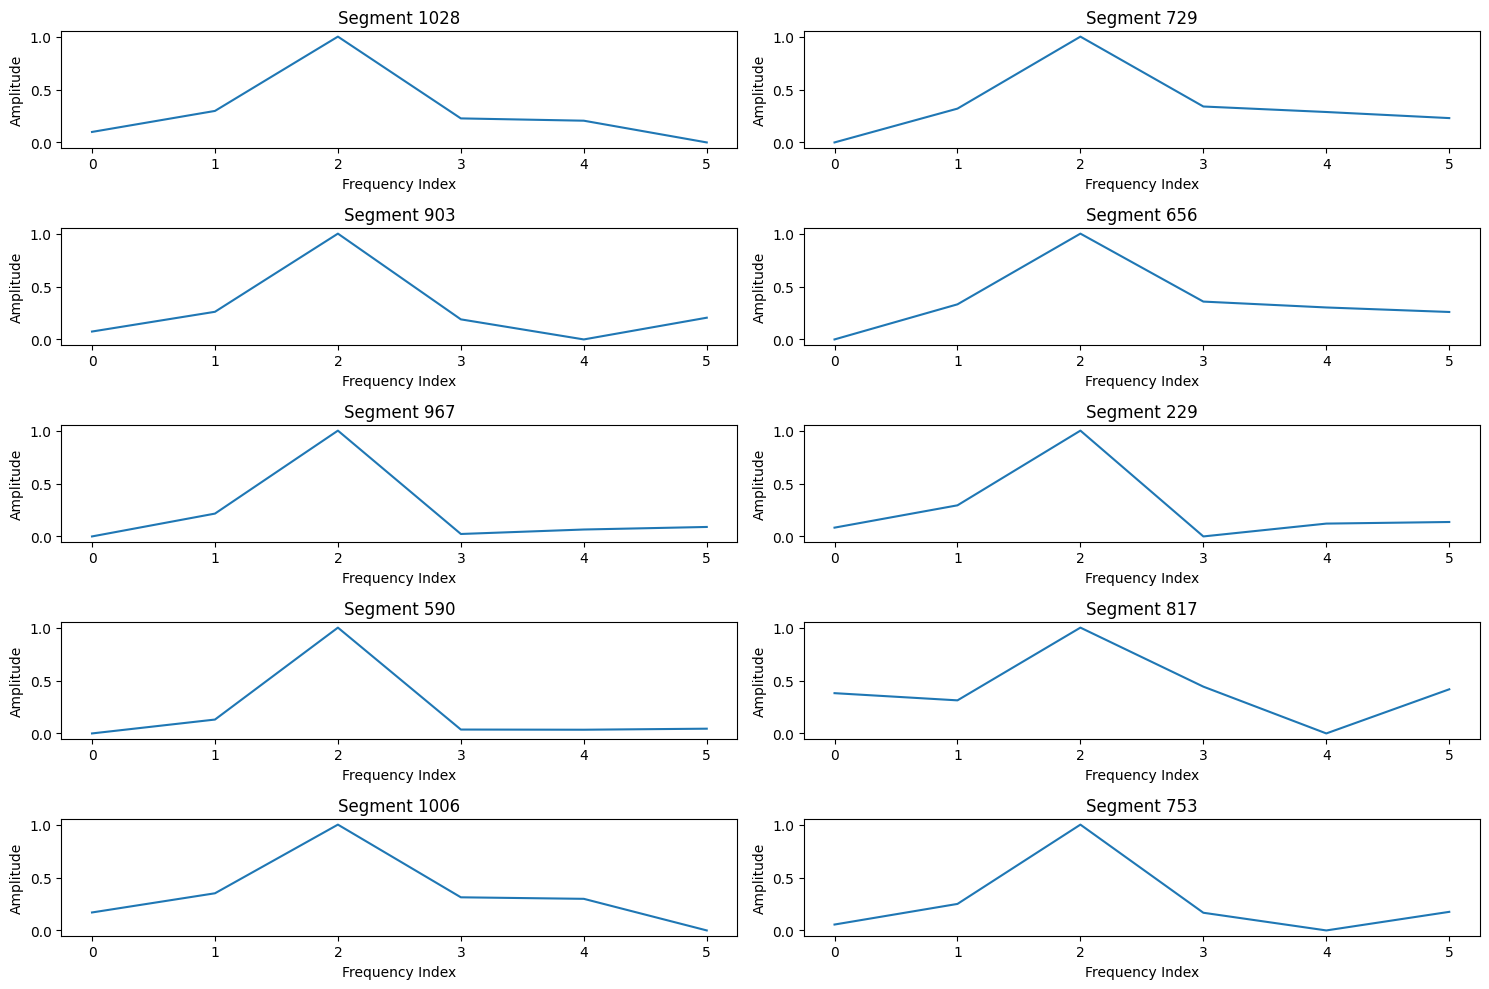

In [13]:
import matplotlib.pyplot as plt
import numpy as np

def plot_random_segments(peak_segments, num_segments=10):
    if len(peak_segments) < num_segments:
        raise ValueError("Not enough segments to plot")

    random_indices = np.random.choice(len(peak_segments), num_segments, replace=False)
    selected_segments = peak_segments[random_indices]

    fig, axes = plt.subplots(5, 2, figsize=(15, 10))
    axes = axes.flatten()

    for i, ax in enumerate(axes):
        ax.plot(selected_segments[i])
        ax.set_title(f'Segment {random_indices[i]}')
        ax.set_xlabel('Frequency Index')
        ax.set_ylabel('Amplitude')

    plt.tight_layout()
    plt.show()

plot_random_segments(normalized_peak_segments)


### Define and Train the Model

In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, losses, backend as K
from tensorflow.keras.layers import Conv1D, Conv1DTranspose, BatchNormalization, LeakyReLU, Input, Reshape, Dense, Flatten, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

data = normalized_peak_segments
print("Original shape:", data.shape)

input_shape = data.shape[1]
latent_dim = 10

data = data.reshape(-1, input_shape, 1)
print("Reshaped shape:", data.shape)

def sampling(args):
    z_mean, z_log_var = args
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

# Encoder
inputs = Input(shape=(input_shape, 1))
x = Conv1D(64, 3, padding='same')(inputs)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Conv1D(128, 3, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Flatten()(x)
h = Dense(128, activation='relu')(x)
z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)

# Sampling
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# Decoder
decoder_h = Dense(128, activation='relu')
decoder_reshape = Dense(input_shape * 64, activation='relu')
decoder_conv1 = Conv1DTranspose(64, 3, padding='same')
decoder_conv2 = Conv1DTranspose(1, 3, padding='same', activation='sigmoid')
h_decoded = decoder_h(z)
h_reshaped = Reshape((input_shape, 64))(decoder_reshape(h_decoded))
x_decoded_intermediate = decoder_conv1(h_reshaped)
x_decoded_intermediate = BatchNormalization()(x_decoded_intermediate)
x_decoded_intermediate = LeakyReLU()(x_decoded_intermediate)
x_decoded_mean = decoder_conv2(x_decoded_intermediate)

# VAE model
vae = Model(inputs, x_decoded_mean)

# Encoder model
encoder = Model(inputs, z_mean)

# Decoder model
decoder_input = Input(shape=(latent_dim,))
_h_decoded = decoder_h(decoder_input)
_h_reshaped = Reshape((input_shape, 64))(decoder_reshape(_h_decoded))
_x_decoded_intermediate = decoder_conv1(_h_reshaped)
_x_decoded_intermediate = BatchNormalization()(_x_decoded_intermediate)
_x_decoded_intermediate = LeakyReLU()(_x_decoded_intermediate)
_x_decoded_mean = decoder_conv2(_x_decoded_intermediate)
generator = Model(decoder_input, _x_decoded_mean)

# VAE loss
reconstruction_loss = losses.mean_squared_error(K.flatten(inputs), K.flatten(x_decoded_mean))
reconstruction_loss = K.sum(reconstruction_loss)
kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)

vae.add_loss(vae_loss)
vae.compile(optimizer=Adam(learning_rate=0.0001))

# Train the VAE
vae.fit(data, epochs=20, batch_size=32)

# Generate new segments
z_sample = np.random.normal(size=(1, latent_dim))
generated_segment = generator.predict(z_sample)
print(generated_segment)


Original shape: (1501, 6)
Reshaped shape: (1501, 6, 1)
Epoch 1/20
47/47 [==============================] - 4s 8ms/step - loss: 0.9257
Epoch 2/20
47/47 [==============================] - 0s 8ms/step - loss: 0.0691
Epoch 3/20
47/47 [==============================] - 0s 8ms/step - loss: 0.0378
Epoch 4/20
47/47 [==============================] - 0s 7ms/step - loss: 0.0293
Epoch 5/20
47/47 [==============================] - 0s 8ms/step - loss: 0.0251
Epoch 6/20
47/47 [==============================] - 0s 8ms/step - loss: 0.0228
Epoch 7/20
47/47 [==============================] - 0s 7ms/step - loss: 0.0213
Epoch 8/20
47/47 [==============================] - 0s 8ms/step - loss: 0.0196
Epoch 9/20
47/47 [==============================] - 0s 7ms/step - loss: 0.0186
Epoch 10/20
47/47 [==============================] - 0s 8ms/step - loss: 0.0183
Epoch 11/20
47/47 [==============================] - 0s 8ms/step - loss: 0.0175
Epoch 12/20
47/47 [==============================] - 0s 7ms/step - loss: 0

### Draw Samples From the Model and Plot Them

In [41]:
n_samples = 10
latent_sample = np.random.normal(size=(n_samples, latent_dim))
generated_peak_segments = generator.predict(latent_sample)
denormalized_generated_peaks = []

for i, segment in enumerate(generated_peak_segments):
    mean = segment_means[i % len(segment_means)]
    std = segment_stds[i % len(segment_stds)]
    denormalized_segment = segment * std + mean
    denormalized_generated_peaks.append(denormalized_segment)

denormalized_generated_peaks = np.array(denormalized_generated_peaks)

1/1 [==============================] - 0s 25ms/step


In [15]:
n_samples = 100
latent_sample = np.random.normal(size=(n_samples, latent_dim))
generated_peak_segments = generator.predict(latent_sample)

denormalized_generated_peaks = []
for i, segment in enumerate(generated_peak_segments):
    min_val = segment_mins[i % len(segment_mins)]
    max_val = segment_maxs[i % len(segment_maxs)]
    denormalized_segment = segment * ((max_val - min_val) + min_val)*1.5
    denormalized_generated_peaks.append(denormalized_segment)

denormalized_generated_peaks = np.array(denormalized_generated_peaks)


4/4 [==============================] - 0s 5ms/step


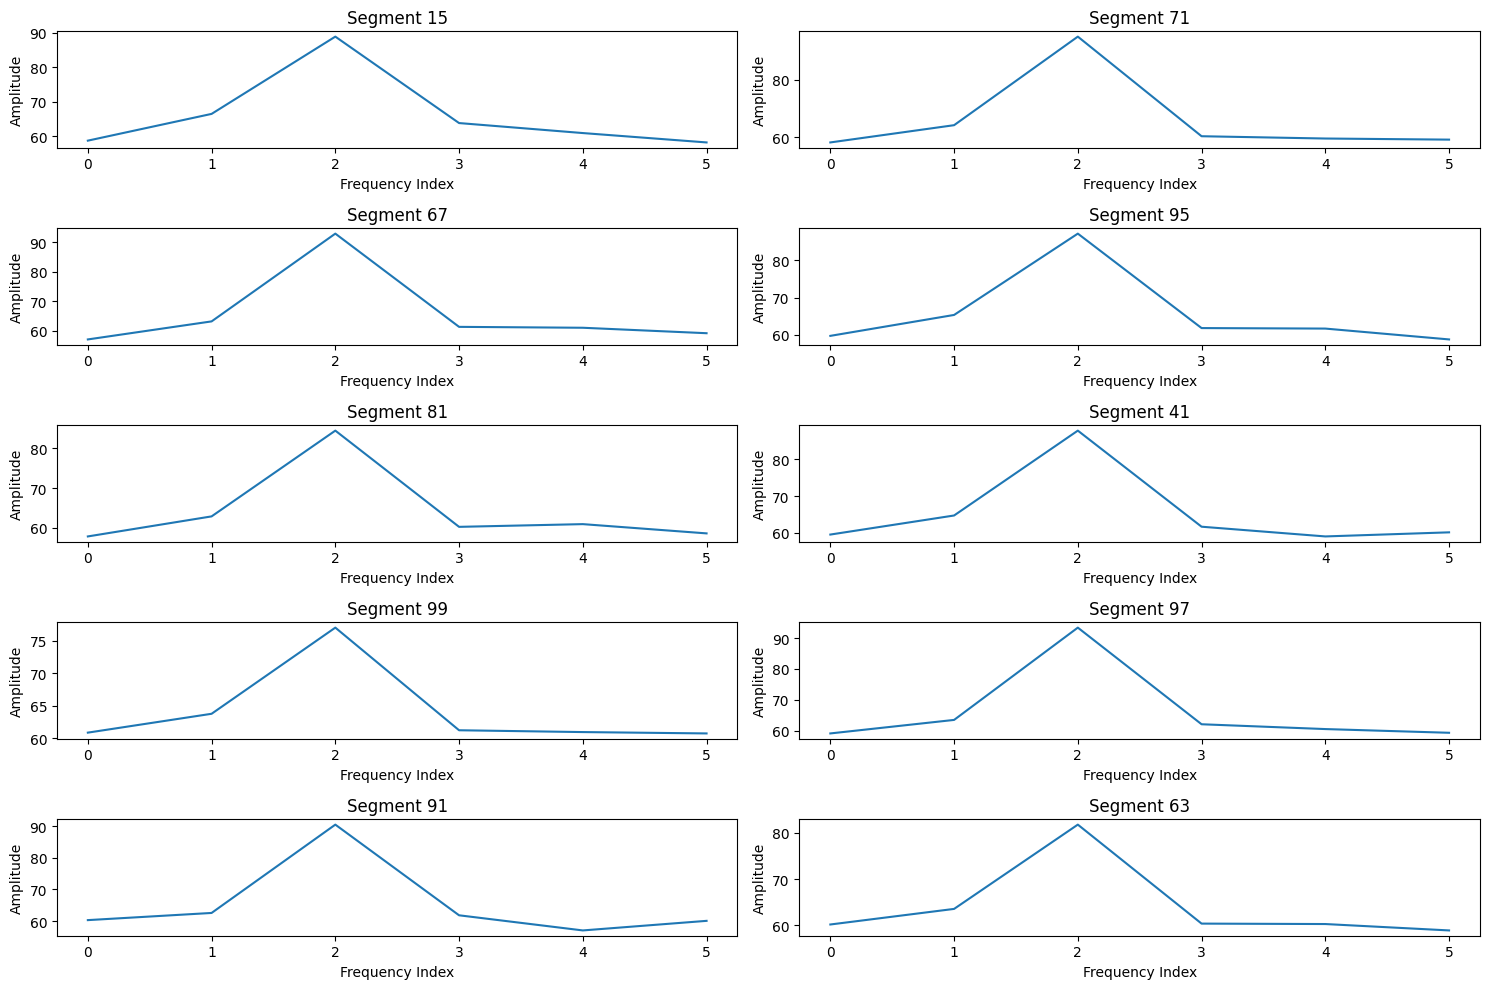

In [16]:
plot_random_segments(denormalized_generated_peaks)

# Inserting Segements

In [21]:
import numpy as np
import pandas as pd
import os

def load_files_from_directory(directory):
    data = []
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            file_path = os.path.join(directory, filename)
            df = pd.read_csv(file_path)
            data.append(df['transformed_value'])
    return np.array(data)

def insert_generated_segments(directory, output_directory,  generated_peak_segments, segment_length=20, target_frequency=50):


    normal_data_files = load_files_from_directory(directory)
    target_frequency = target_frequency*2+2

    for i, data in enumerate(normal_data_files):
        for generated_peak in generated_peak_segments:
            start = max(0, target_frequency - segment_length // 2)
            end = min(len(data), start + segment_length)
            if end - start < segment_length:
                generated_peak = generated_peak[:end-start]

            data[start:end] = generated_peak.flatten()

        df = pd.DataFrame(data, columns=["Data"])
        df.to_csv(os.path.join(output_directory, f'synt_anomalous_data_{i}.csv'), index=False)


    return normal_data_files

directory = '/content/Normal For Synt'

output_directory = '/content/Synt_Anomalous'

anomalous_data = insert_generated_segments(directory, output_directory, denormalized_generated_peaks, segment_length=6, target_frequency=150)


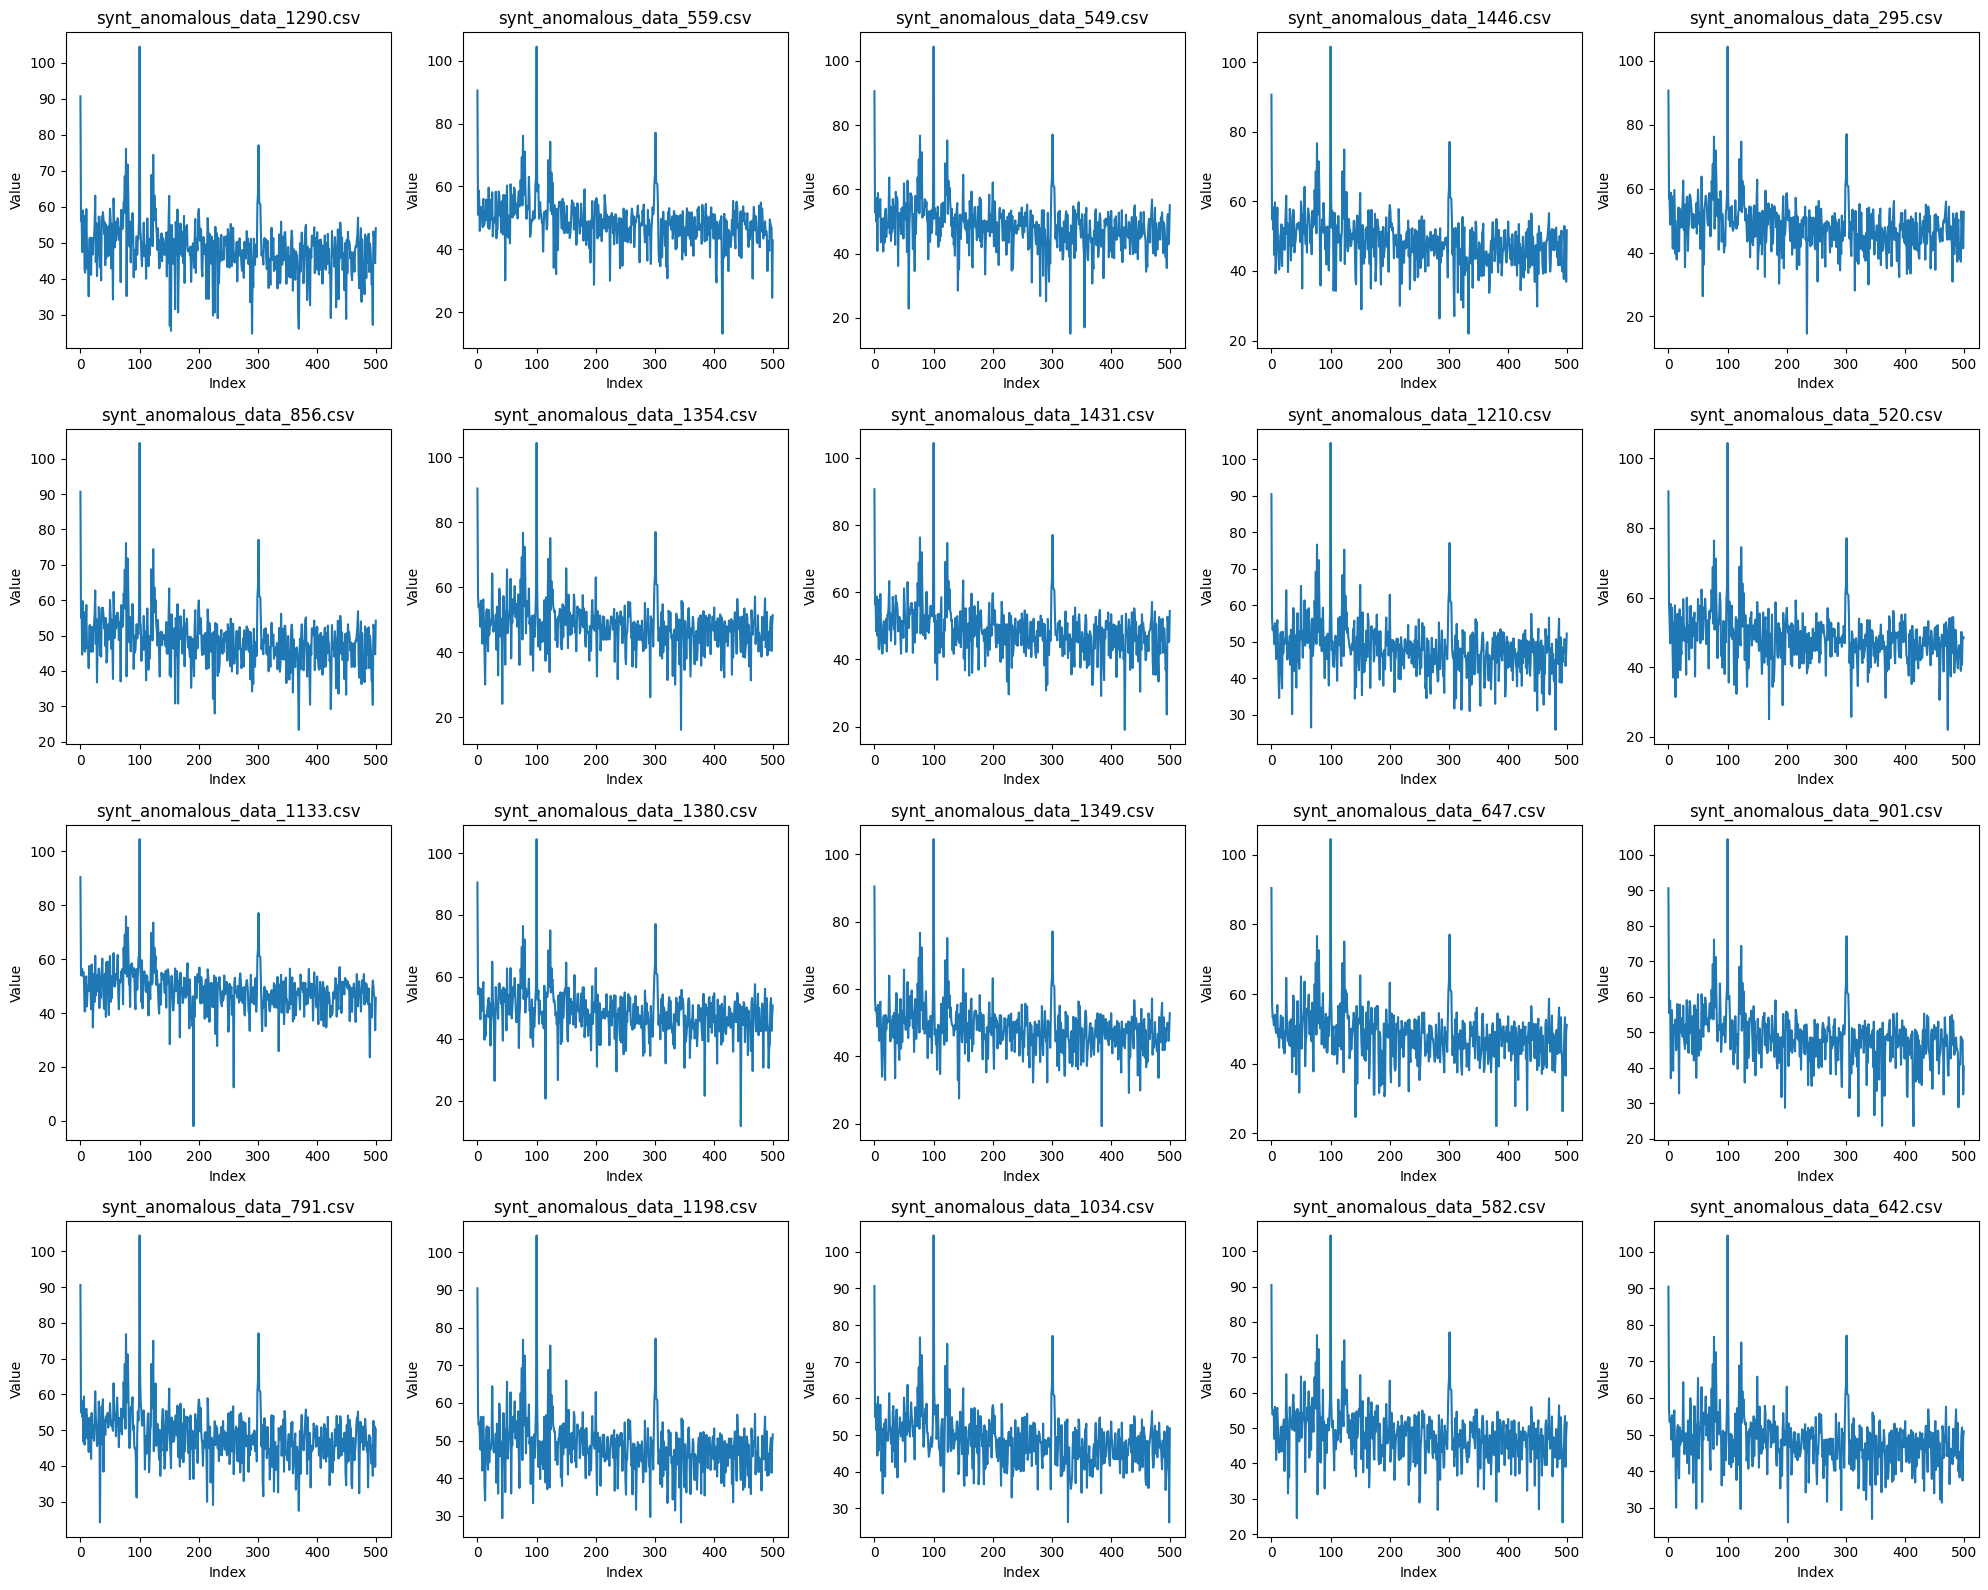

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import random

def plot_random_files_from_directory(directory, num_files=20):
    """Plot 20 random files from the specified directory."""
    files = [f for f in os.listdir(directory) if f.endswith('.csv')]

    random_files = random.sample(files, min(num_files, len(files)))

    fig, axes = plt.subplots(4, 5, figsize=(20, 16))
    axes = axes.flatten()

    for i, file in enumerate(random_files):
        file_path = os.path.join(directory, file)
        df = pd.read_csv(file_path)
        data = df['Data'].values

        axes[i].plot(data)
        axes[i].set_title(file)
        axes[i].set_xlabel('Index')
        axes[i].set_ylabel('Value')

    plt.tight_layout()
    plt.show()

directory = '/content/Synt_Anomalous'

plot_random_files_from_directory(directory, num_files=20)


In [23]:
import shutil
import os

def zip_folder(folder_path, zip_path):
    shutil.make_archive(zip_path, 'zip', folder_path)

folder_path = '/content/Synt_Anomalous'
zip_path = '/content/Anomalous_Sample_Zipped'

zip_folder(folder_path, zip_path)
